# Draw Histogram of the given image and perform Histogram Equalization

### Algorithm:
1. Load the image matrix and create a dictionary with the 'keys' as the pixels and 'values' as the frequency of each pixel
2. Add 'keys' for missing pixels and initiate their 'values' as 0
3. Find the cumulative sum for each pixel frequency and save them as 'values' of the dictionary
4. Divide each cumulative sum by the maximum pixel frequency and save them in the dictionary
5. Multiply each pixel from the above to the maximum pixel value and save them in the dictionary
6. Replace each pixel of the exisitng image with the newly mapped pixels for the equalized histogram
7. Display the image and histogram for the equalized image

In [1]:
# Import the required libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

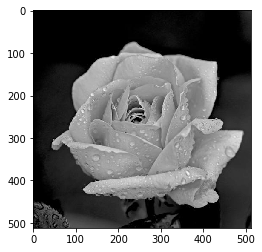

In [2]:
# Read the image in grayscale and display it
image = cv2.imread('rose.jpg', 0)
plt.imshow(image, cmap='gray')

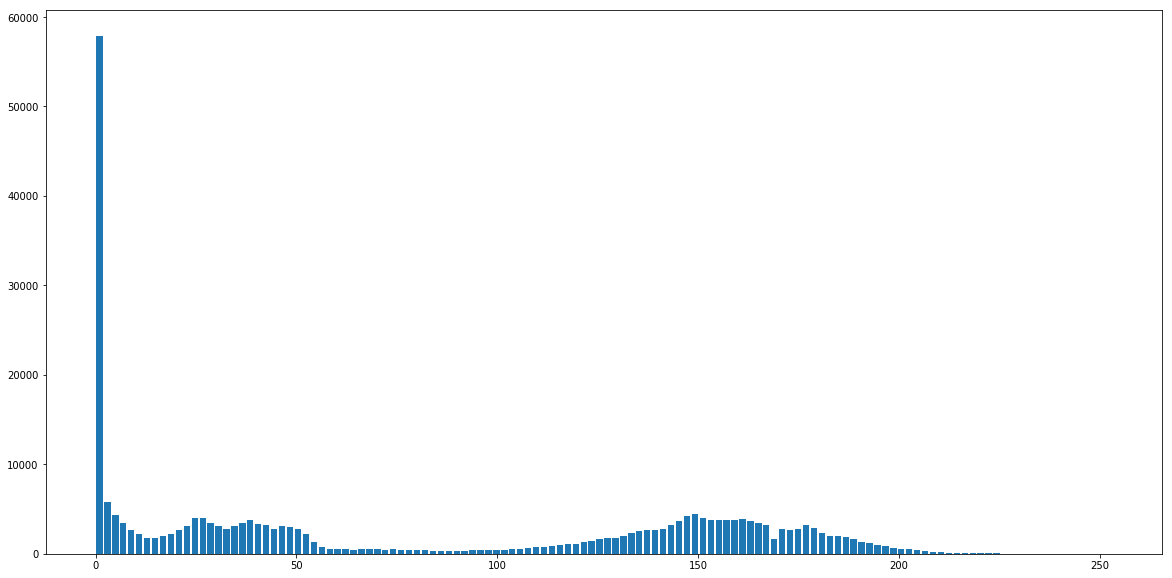

In [3]:
# Plot the hisogram of the original image
plt.figure(figsize=(20, 10))
plt.hist(image.ravel(), 128, rwidth=0.8)
plt.show()

In [4]:
# Step 1 of the Algorithm
img_info = np.unique(image, return_counts=True)
img_freq_dict = dict()
for i in range(len(img_info[0])):
    img_freq_dict[img_info[0][i]] = img_info[1][i]
img_freq_dict

{0: 53720,
 1: 4149,
 2: 3299,
 3: 2522,
 4: 2249,
 5: 2053,
 6: 1854,
 7: 1593,
 8: 1401,
 9: 1309,
 10: 1159,
 11: 1019,
 12: 895,
 13: 885,
 14: 822,
 15: 901,
 16: 909,
 17: 1039,
 18: 1015,
 19: 1176,
 20: 1236,
 21: 1371,
 22: 1432,
 23: 1684,
 24: 1873,
 25: 2157,
 26: 2049,
 27: 1959,
 28: 1786,
 29: 1667,
 30: 1619,
 31: 1520,
 32: 1372,
 33: 1346,
 34: 1407,
 35: 1743,
 36: 1631,
 37: 1802,
 38: 1951,
 39: 1781,
 40: 1796,
 41: 1578,
 42: 1564,
 43: 1628,
 44: 1409,
 45: 1381,
 46: 1337,
 47: 1764,
 48: 1453,
 49: 1568,
 50: 1351,
 51: 1418,
 52: 1371,
 53: 865,
 54: 775,
 55: 493,
 56: 402,
 57: 337,
 58: 267,
 59: 278,
 60: 259,
 61: 286,
 62: 263,
 63: 263,
 64: 237,
 65: 241,
 66: 251,
 67: 274,
 68: 269,
 69: 281,
 70: 275,
 71: 243,
 72: 242,
 73: 222,
 74: 242,
 75: 252,
 76: 237,
 77: 234,
 78: 210,
 79: 216,
 80: 184,
 81: 189,
 82: 189,
 83: 193,
 84: 312,
 85: 154,
 86: 143,
 87: 140,
 88: 150,
 89: 166,
 90: 152,
 91: 177,
 92: 160,
 93: 178,
 94: 211,
 95: 209,
 

In [5]:
# Step 2 of the Algorithm
hist_dict = dict()
for i in range(256):
    hist_dict[i] = img_freq_dict.get(i, 0)
hist_dict

{0: 53720,
 1: 4149,
 2: 3299,
 3: 2522,
 4: 2249,
 5: 2053,
 6: 1854,
 7: 1593,
 8: 1401,
 9: 1309,
 10: 1159,
 11: 1019,
 12: 895,
 13: 885,
 14: 822,
 15: 901,
 16: 909,
 17: 1039,
 18: 1015,
 19: 1176,
 20: 1236,
 21: 1371,
 22: 1432,
 23: 1684,
 24: 1873,
 25: 2157,
 26: 2049,
 27: 1959,
 28: 1786,
 29: 1667,
 30: 1619,
 31: 1520,
 32: 1372,
 33: 1346,
 34: 1407,
 35: 1743,
 36: 1631,
 37: 1802,
 38: 1951,
 39: 1781,
 40: 1796,
 41: 1578,
 42: 1564,
 43: 1628,
 44: 1409,
 45: 1381,
 46: 1337,
 47: 1764,
 48: 1453,
 49: 1568,
 50: 1351,
 51: 1418,
 52: 1371,
 53: 865,
 54: 775,
 55: 493,
 56: 402,
 57: 337,
 58: 267,
 59: 278,
 60: 259,
 61: 286,
 62: 263,
 63: 263,
 64: 237,
 65: 241,
 66: 251,
 67: 274,
 68: 269,
 69: 281,
 70: 275,
 71: 243,
 72: 242,
 73: 222,
 74: 242,
 75: 252,
 76: 237,
 77: 234,
 78: 210,
 79: 216,
 80: 184,
 81: 189,
 82: 189,
 83: 193,
 84: 312,
 85: 154,
 86: 143,
 87: 140,
 88: 150,
 89: 166,
 90: 152,
 91: 177,
 92: 160,
 93: 178,
 94: 211,
 95: 209,
 

In [6]:
# Step 3 of the Algorithm
for i, key in enumerate(hist_dict.keys()):
    hist_dict[key] = hist_dict.get(i-1, 0) + hist_dict.get(i)
hist_dict

{0: 53720,
 1: 57869,
 2: 61168,
 3: 63690,
 4: 65939,
 5: 67992,
 6: 69846,
 7: 71439,
 8: 72840,
 9: 74149,
 10: 75308,
 11: 76327,
 12: 77222,
 13: 78107,
 14: 78929,
 15: 79830,
 16: 80739,
 17: 81778,
 18: 82793,
 19: 83969,
 20: 85205,
 21: 86576,
 22: 88008,
 23: 89692,
 24: 91565,
 25: 93722,
 26: 95771,
 27: 97730,
 28: 99516,
 29: 101183,
 30: 102802,
 31: 104322,
 32: 105694,
 33: 107040,
 34: 108447,
 35: 110190,
 36: 111821,
 37: 113623,
 38: 115574,
 39: 117355,
 40: 119151,
 41: 120729,
 42: 122293,
 43: 123921,
 44: 125330,
 45: 126711,
 46: 128048,
 47: 129812,
 48: 131265,
 49: 132833,
 50: 134184,
 51: 135602,
 52: 136973,
 53: 137838,
 54: 138613,
 55: 139106,
 56: 139508,
 57: 139845,
 58: 140112,
 59: 140390,
 60: 140649,
 61: 140935,
 62: 141198,
 63: 141461,
 64: 141698,
 65: 141939,
 66: 142190,
 67: 142464,
 68: 142733,
 69: 143014,
 70: 143289,
 71: 143532,
 72: 143774,
 73: 143996,
 74: 144238,
 75: 144490,
 76: 144727,
 77: 144961,
 78: 145171,
 79: 145387,

In [7]:
# Step 4 of the Algorithm
for i, key in enumerate(hist_dict.keys()):
    hist_dict[key] = hist_dict.get(i)/max(hist_dict.values())
hist_dict

{0: 0.204925537109375,
 1: 0.22075271606445312,
 2: 0.23333740234375,
 3: 0.24295806884765625,
 4: 0.2515373229980469,
 5: 0.259368896484375,
 6: 0.26644134521484375,
 7: 0.2725181579589844,
 8: 0.277862548828125,
 9: 0.2828559875488281,
 10: 0.2872772216796875,
 11: 0.2911643981933594,
 12: 0.29457855224609375,
 13: 0.2979545593261719,
 14: 0.3010902404785156,
 15: 0.30452728271484375,
 16: 0.3079948425292969,
 17: 0.31195831298828125,
 18: 0.3158302307128906,
 19: 0.3203163146972656,
 20: 0.3250312805175781,
 21: 0.33026123046875,
 22: 0.335723876953125,
 23: 0.3421478271484375,
 24: 0.3492927551269531,
 25: 0.35752105712890625,
 26: 0.3653373718261719,
 27: 0.37281036376953125,
 28: 0.3796234130859375,
 29: 0.3859825134277344,
 30: 0.39215850830078125,
 31: 0.39795684814453125,
 32: 0.40319061279296875,
 33: 0.4083251953125,
 34: 0.4136924743652344,
 35: 0.42034149169921875,
 36: 0.4265632629394531,
 37: 0.4334373474121094,
 38: 0.44087982177734375,
 39: 0.4476737976074219,
 40: 0.4

In [8]:
# Step 5 of the Algorithm
for i, key in enumerate(hist_dict.keys()):
    hist_dict[key] = np.round(hist_dict.get(i) * max(hist_dict.keys()))
hist_dict

{0: 52.0,
 1: 56.0,
 2: 60.0,
 3: 62.0,
 4: 64.0,
 5: 66.0,
 6: 68.0,
 7: 69.0,
 8: 71.0,
 9: 72.0,
 10: 73.0,
 11: 74.0,
 12: 75.0,
 13: 76.0,
 14: 77.0,
 15: 78.0,
 16: 79.0,
 17: 80.0,
 18: 81.0,
 19: 82.0,
 20: 83.0,
 21: 84.0,
 22: 86.0,
 23: 87.0,
 24: 89.0,
 25: 91.0,
 26: 93.0,
 27: 95.0,
 28: 97.0,
 29: 98.0,
 30: 100.0,
 31: 101.0,
 32: 103.0,
 33: 104.0,
 34: 105.0,
 35: 107.0,
 36: 109.0,
 37: 111.0,
 38: 112.0,
 39: 114.0,
 40: 116.0,
 41: 117.0,
 42: 119.0,
 43: 121.0,
 44: 122.0,
 45: 123.0,
 46: 125.0,
 47: 126.0,
 48: 128.0,
 49: 129.0,
 50: 131.0,
 51: 132.0,
 52: 133.0,
 53: 134.0,
 54: 135.0,
 55: 135.0,
 56: 136.0,
 57: 136.0,
 58: 136.0,
 59: 137.0,
 60: 137.0,
 61: 137.0,
 62: 137.0,
 63: 138.0,
 64: 138.0,
 65: 138.0,
 66: 138.0,
 67: 139.0,
 68: 139.0,
 69: 139.0,
 70: 139.0,
 71: 140.0,
 72: 140.0,
 73: 140.0,
 74: 140.0,
 75: 141.0,
 76: 141.0,
 77: 141.0,
 78: 141.0,
 79: 141.0,
 80: 142.0,
 81: 142.0,
 82: 142.0,
 83: 142.0,
 84: 142.0,
 85: 143.0,
 86: 143

In [9]:
# Step 6 of the Algorithm
final_img = np.zeros(image.shape)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        final_img[i][j] = hist_dict[image[i][j]]
final_img

array([[ 52.,  52.,  52., ..., 131., 131., 131.],
       [ 52.,  52.,  52., ..., 131., 131., 131.],
       [ 52.,  52.,  52., ..., 131., 131., 131.],
       ...,
       [139., 103.,  52., ..., 131., 125., 121.],
       [114.,  84.,  56., ..., 134., 132., 131.],
       [105., 111., 103., ..., 135., 135., 135.]])

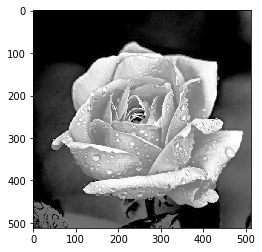

In [10]:
# Display the Histogram Equalized image
plt.imshow(final_img, cmap='gray')

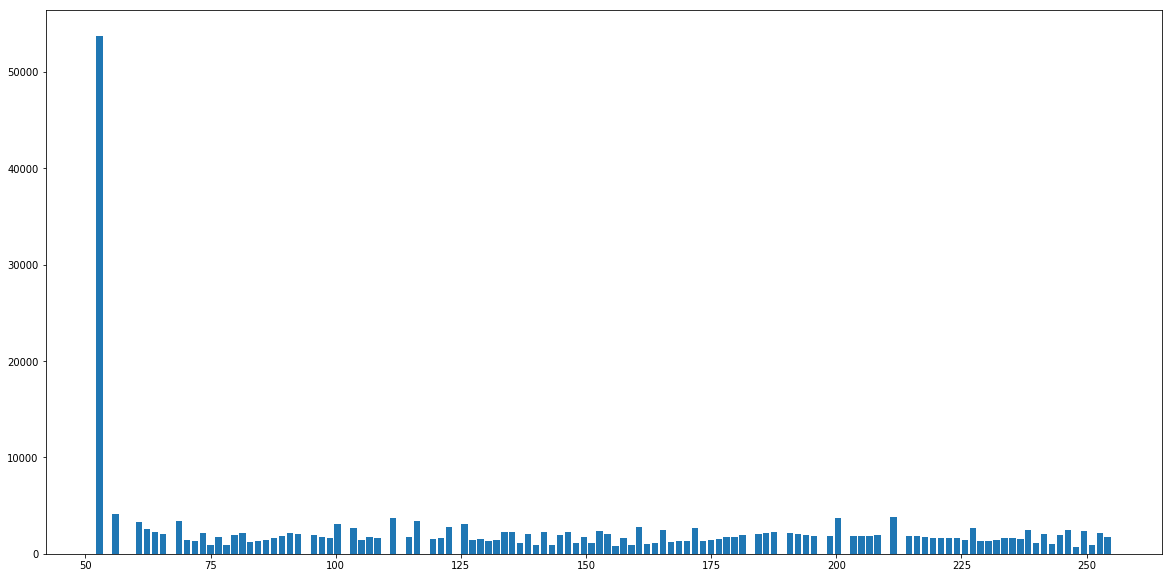

In [11]:
# Display the Equalized Histogram
plt.figure(figsize=(20, 10))
plt.hist(final_img.ravel(), 128, rwidth=0.8)
plt.show()